# COMP 9517

# Usama Sadiq

# z5235652

# Lab-04

***

In [1]:
import cv2 as cv
import sklearn as sk
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt

from scipy import ndimage as ndi

from skimage.segmentation import watershed

from skimage.feature import peak_local_max

In [2]:
print("opencv version: {}".format(cv.__version__))
print("scikit version: {}".format(sk.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mat.__version__))

opencv version: 3.4.2
scikit version: 0.24.1
numpy version: 1.19.2
matplotlib version: 3.3.4


***
## Task 1 Watershed Segmentation
***

### Step 1

#### Convert the image to greyscale

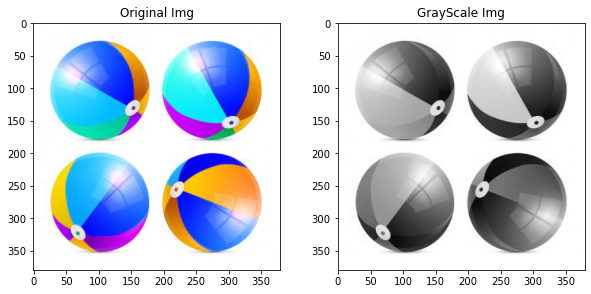

In [3]:
def readAndConvertGray(filename):
    img = cv.imread(filename)
    
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title("Original Img")
    plt.imshow(img)
    
    #Convert the image to gray
    gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    plt.subplot(2,2,2)
    plt.title("GrayScale Img")
    plt.imshow(gray_img,"gray")
    plt.show()
    
    return gray_img

filename = "ball_set.jpg"


gray_img = readAndConvertGray(filename)

***
### Step

#### Negative of img. Since the background is white and forground is non white.

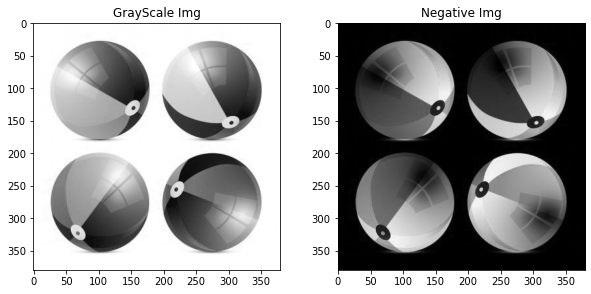

In [4]:
#Calculate negative of an image using bitwise not
img_neg = cv.bitwise_not(gray_img)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("GrayScale Img")
plt.imshow(gray_img,"gray")

plt.subplot(2,2,2)
plt.title("Negative Img")
plt.imshow(img_neg,"gray")

plt.show()

***
### Step

### Remove Noise using Median Blur



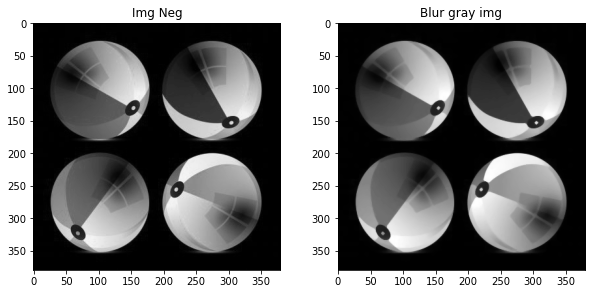

In [5]:
#Remove noise using blur

#blur_img = cv.GaussianBlur(img_neg,(5,5),0)

blur_img = cv.medianBlur(img_neg,5)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Img Neg")


plt.imshow(img_neg,"gray")

plt.subplot(2,2,2)
plt.title("Blur gray img")

plt.imshow(blur_img,"gray")
plt.show()

***

### Step

#### Calculate Histrogram for Thresholding

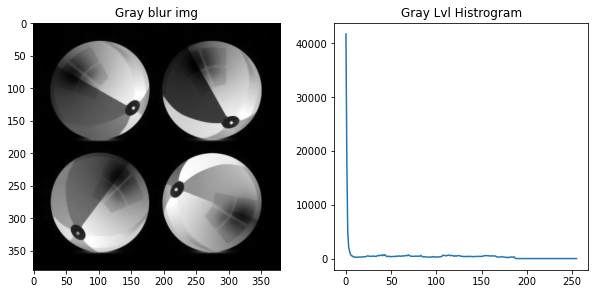

In [6]:
#Calculate Histrogram for Thresholding
hist = cv.calcHist([blur_img],[0],None,[256],[0,256])


plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Gray blur img")

plt.imshow(blur_img,"gray")

plt.subplot(2,2,2)
plt.title("Gray Lvl Histrogram")
plt.plot(hist)

plt.show()

***

### Step

### Use Thresholding to produce binary image


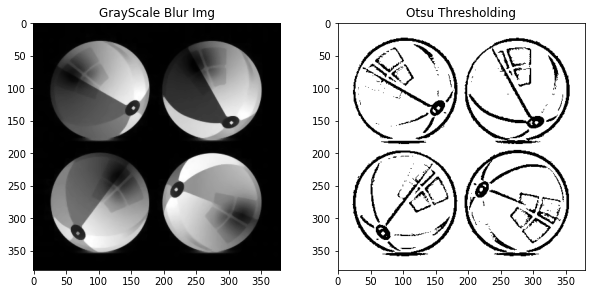

In [7]:
#Use thresholding to convert img to binary

#th1,otsu_img = cv.threshold(blur_img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#otsu_img = cv.adaptiveThreshold(blur_img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

otsu_img = cv.adaptiveThreshold(blur_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("GrayScale Blur Img")
plt.imshow(blur_img,"gray")

plt.subplot(2,2,2)
plt.title("Otsu Thresholding")
plt.imshow(otsu_img,"gray")

plt.show()

#print(th1)

***

### Step 

### Calculate Distance Transform between background and objects

### Find Markers and segment image using watershed method of scikit

### Visualize

#### Plot the result of the distance transform

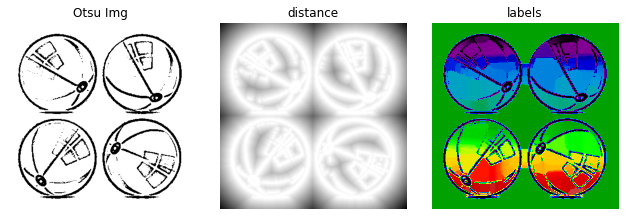

In [8]:
#calculate the distance transform of the image
distance = ndi.distance_transform_edt(otsu_img)

#find coordinates for markers
coords = peak_local_max(distance, footprint=np.ones((3,3)), labels = otsu_img)

#Creating a new mask
mask = np.zeros(distance.shape, dtype=bool)

#Setting the markers
mask[tuple(coords.T)] = True

#Using Watershed Method using markers found previously
markers, _ = ndi.label(mask)

labels = watershed(-distance, markers, mask=otsu_img)

fig, axes = plt.subplots(ncols=3, figsize=(9,3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(otsu_img, cmap=plt.cm.gray)
ax[0].set_title('Otsu Img')

ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('distance')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title("labels")

for a in ax:
    a.set_axis_off()
    
fig.tight_layout()
plt.show()

***
# Task 2

# MeanShift

### use the meanshift algorithm to segment the input image ball_set.jpg

### Step 

### Input the image

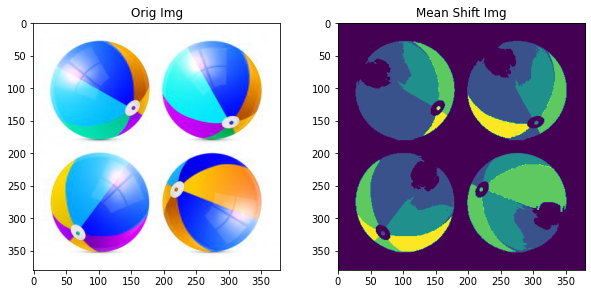

done......


In [9]:
from sklearn.cluster import MeanShift,estimate_bandwidth



def read_img_gray_scale_img(filename):
    
    img = cv.imread(filename)
    
    #flaten the vector i.e. h*w,3 shape
    flattened_img = np.reshape(img,(-1,3))
    
    #print(flattened_img.shape)
    
    #estimate the bandwidth of the falttened image for Meanshift method
    bandwidth = estimate_bandwidth(flattened_img, quantile = 0.2, n_samples = 500)
    
    
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    #Training and Predictions
    flat_img = clustering.fit_predict(flattened_img)
    
    #Labels
    labels = clustering.labels_
    
#     #Cluster centers
#     cluster_centers = clustering.cluster_centers_
    
#     #Unique Labels
#     labels_unique = np.unique(labels)
    
#     #No of clusters
#     n_clusters_ = len(labels_unique)
    
#     print("number of estimated clusters : {} ".format(n_clusters_))
    
    #Segmented Img labels back to orig img shape
    segmentedImg = np.reshape(labels, img.shape[:2])
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    
    plt.title("Orig Img")
    
    plt.imshow(img)
    
    plt.subplot(2,2,2)
    
    plt.title("Mean Shift Img")
    
    plt.imshow(segmentedImg.astype(np.uint8))
    
    plt.show()
    
    print("done......")
    
    return segmentedImg
    

filename = "ball_set.jpg"

Segmented_Img = read_img_gray_scale_img(filename)


***
# Task 3

### Step

### Read input image and convert image to grayscale

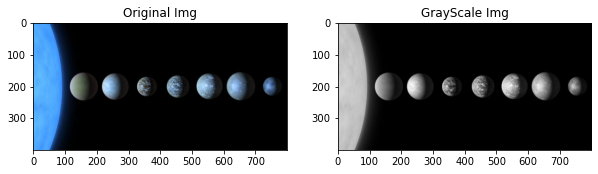

In [10]:
filename = "planets.jpg"

#Converting the img to grayscale
gray_img_1 = readAndConvertGray(filename)

***
### Step

### Using Median Blur function to remove noise

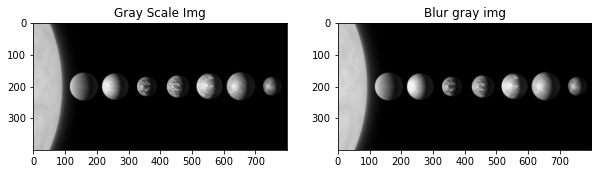

In [11]:
#blur_img = cv.GaussianBlur(img_neg,(5,5),0)

#Remove noise using medianblur
blur_img_1 = cv.medianBlur(gray_img_1,5)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Gray Scale Img")


plt.imshow(gray_img_1,"gray")

plt.subplot(2,2,2)
plt.title("Blur gray img")

plt.imshow(blur_img_1,"gray")
plt.show()

***
### Step

### Calculate Histrogram for Thresholding

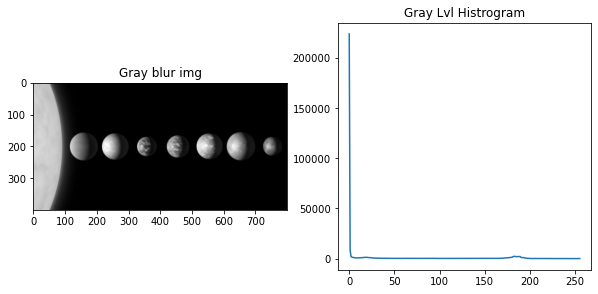

In [12]:
#Caclulate Histrogram for Thresholding
hist_1 = cv.calcHist([blur_img_1],[0],None,[256],[0,256])


plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Gray blur img")

plt.imshow(blur_img_1,"gray")

plt.subplot(2,2,2)
plt.title("Gray Lvl Histrogram")
plt.plot(hist_1)

plt.show()

***

### Step

### Adaptive Thresholding / Otsu's Thresholding

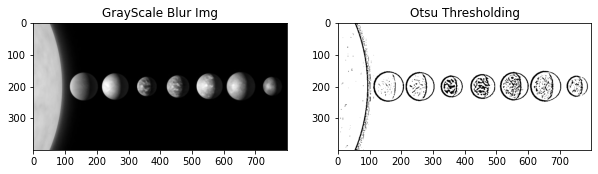

In [13]:
#Use thresholding to convert the image to binary image

#th2,otsu_img_1 = cv.threshold(blur_img_1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#otsu_img_1 = cv.adaptiveThreshold(blur_img_1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

otsu_img_1 = cv.adaptiveThreshold(blur_img_1,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("GrayScale Blur Img")
plt.imshow(blur_img_1,"gray")

plt.subplot(2,2,2)
plt.title("Otsu Thresholding")
plt.imshow(otsu_img_1,"gray")

plt.show()

#print(th1)

***

### Step 

### Calculate Distance Transform between background and objects

### Find Markers and segment image using watershed method of scikit

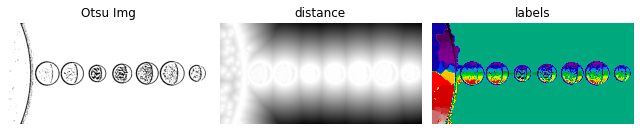

In [14]:
#calulate distance transform of the img
distance_1 = ndi.distance_transform_edt(otsu_img_1)

#find coordinates for markers
coords_1 = peak_local_max(distance_1, footprint=np.ones((3,3)), labels = otsu_img_1)

#Creating a new mask
mask_1 = np.zeros(distance_1.shape, dtype=bool)

#Setting the markers
mask_1[tuple(coords_1.T)] = True

markers_1, _ = ndi.label(mask_1)

#Using Watershed Method using markers found previously
labels_1 = watershed(-distance_1, markers_1, mask=otsu_img_1)

fig_1, axes_1 = plt.subplots(ncols=3, figsize=(9,3), sharex=True, sharey=True)
ax_1 = axes_1.ravel()

ax_1[0].imshow(otsu_img_1, cmap=plt.cm.gray)
ax_1[0].set_title('Otsu Img')

ax_1[1].imshow(-distance_1, cmap=plt.cm.gray)
ax_1[1].set_title('distance')

ax_1[2].imshow(labels_1, cmap=plt.cm.nipy_spectral)
ax_1[2].set_title("labels")

for a in ax_1:
    a.set_axis_off()
    
fig_1.tight_layout()
plt.show()

***
### Step

### Image Segmentation Using Meanshift Method (Scikit)

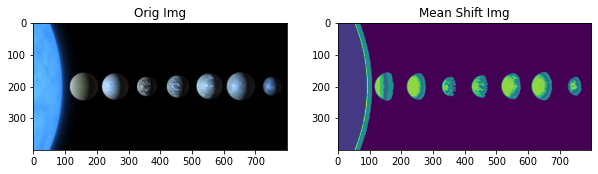

done......


In [15]:
filename = "planets.jpg"

segmented_Img_1 = read_img_gray_scale_img(filename)

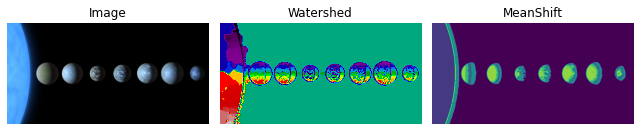

In [16]:
Img = cv.imread("planets.jpg")

fig_2, axes_2 = plt.subplots(ncols=3, figsize=(9,3), sharex=True, sharey=True)
ax_2 = axes_2.ravel()

ax_2[0].imshow(Img, cmap=plt.cm.gray)
ax_2[0].set_title('Image')

ax_2[1].imshow(labels_1, cmap=plt.cm.nipy_spectral)
ax_2[1].set_title('Watershed')

ax_2[2].imshow(segmented_Img_1.astype(np.uint8))
ax_2[2].set_title("MeanShift")

for a in ax_2:
    a.set_axis_off()
    
fig_2.tight_layout()
plt.show()

# Comparison between watershed and Meanshift

While watershed algorithm has done a good job at identifying the boundries of the planets and the sun. It also did identify some of the inner lines of the planets but also missed some lines inside the planets.

While Meanshift did a great job at identifying the boundries of the planets and the sun. It also did a better job at identifying the inner lines of the planets but it missed the darker areas of the planets.

***

# References

1) Converting to GrayScale https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab

2) Taking the negative of the image https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html

3) Remove the noise https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html

4) Thresholding https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

5) Watershed Algorithm https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html

6) Meanshift Algorithm https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html

7) Estimate Bandwidth https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html